In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 139s 297ms/step - loss: 2.2859 - accuracy: 0.1219 - val_loss: 2.2417 - val_accuracy: 0.2387
Epoch 2/12
469/469 [==============================] - 138s 295ms/step - loss: 2.2172 - accuracy: 0.2460 - val_loss: 2.1615 - val_accuracy: 0.4586
Epoch 3/12
469/469 [==============================] - 139s 296ms/step - loss: 2.1351 - accuracy: 0.3604 - val_loss: 2.0595 - val_accuracy: 0.5728
Epoch 4/12
469/469 [==============================] - 138s 295ms/step - loss: 2.0294 - accuracy: 0.4418 - val_loss: 1.9283 - val_accuracy: 0.6340
Epoch 5/12
469/469 [==============================] - 139s 296ms/step - loss: 1.8976 - accuracy: 0.5067 - val_loss: 1.7651 - val_accuracy: 0.6874
Epoch 6/12
469/469 [==============================] - 139s 296ms/step - loss: 1.7445 - accuracy: 0.5559 - val_loss: 1.5766 - val_accuracy: 0.7347
Epoch 7/12
469/469 [==============================]

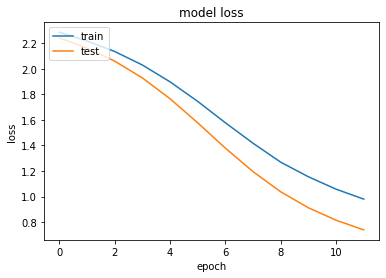

In [3]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 1

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

hist2=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 117s 249ms/step - loss: 0.3988 - accuracy: 0.8746 - val_loss: 0.0668 - val_accuracy: 0.9802
Epoch 2/12
469/469 [==============================] - 116s 248ms/step - loss: 0.1351 - accuracy: 0.9595 - val_loss: 0.0451 - val_accuracy: 0.9855
Epoch 3/12
469/469 [==============================] - 116s 247ms/step - loss: 0.1021 - accuracy: 0.9694 - val_loss: 0.0383 - val_accuracy: 0.9881
Epoch 4/12
469/469 [==============================] - 115s 246ms/step - loss: 0.0898 - accuracy: 0.9720 - val_loss: 0.0385 - val_accuracy: 0.9881
Epoch 5/12
469/469 [==============================] - 115s 245ms/step - loss: 0.0780 - accuracy: 0.9767 - val_loss: 0.0383 - val_accuracy: 0.9868
Epoch 6/12
469/469 [==============================] - 115s 244ms/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.0297 - val_accuracy: 0.9901
Epoch 7/12
469/469 [==============================] - 119s 254ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0310 -

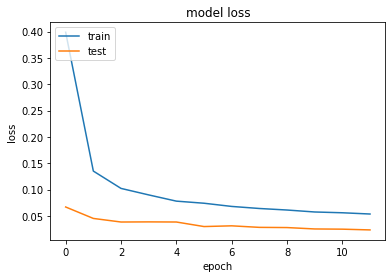

In [5]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 2

In [6]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

hist3=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 177s 377ms/step - loss: 0.2660 - accuracy: 0.9174 - val_loss: 0.1020 - val_accuracy: 0.9685
Epoch 2/12
469/469 [==============================] - 177s 378ms/step - loss: 0.0804 - accuracy: 0.9770 - val_loss: 0.0392 - val_accuracy: 0.9893
Epoch 3/12
469/469 [==============================] - 177s 377ms/step - loss: 0.0636 - accuracy: 0.9823 - val_loss: 0.0318 - val_accuracy: 0.9898
Epoch 4/12
469/469 [==============================] - 176s 374ms/step - loss: 0.0510 - accuracy: 0.9854 - val_loss: 0.0476 - val_accuracy: 0.9855
Epoch 5/12
469/469 [==============================] - 174s 371ms/step - loss: 0.0500 - accuracy: 0.9857 - val_loss: 0.0311 - val_accuracy: 0.9910
Epoch 6/12
469/469 [==============================] - 175s 373ms/step - loss: 0.0440 - accuracy: 0.9872 - val_loss: 0.0289 - val_accuracy: 0.9909
Epoch 7/12
469/469 [==============================] - 174s 371ms/step - loss: 0.0378 - accuracy: 0.9888 - val_loss: 0.0275 -

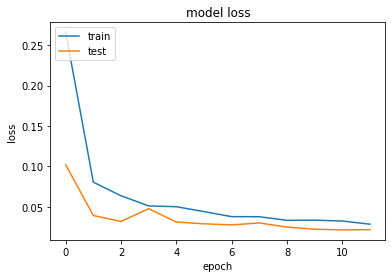

In [7]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3

In [8]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu',padding="same"))
model.add(Conv2D(64, (7, 7), activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), activation='relu',padding="same"))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

hist4=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 482s 1s/step - loss: 0.2320 - accuracy: 0.9317 - val_loss: 0.1042 - val_accuracy: 0.9673
Epoch 2/12
469/469 [==============================] - 484s 1s/step - loss: 0.0763 - accuracy: 0.9796 - val_loss: 0.0446 - val_accuracy: 0.9867
Epoch 3/12
469/469 [==============================] - 480s 1s/step - loss: 0.0608 - accuracy: 0.9843 - val_loss: 0.1031 - val_accuracy: 0.9716
Epoch 4/12
469/469 [==============================] - 484s 1s/step - loss: 0.0520 - accuracy: 0.9867 - val_loss: 0.0583 - val_accuracy: 0.9873
Epoch 5/12
469/469 [==============================] - 478s 1s/step - loss: 0.0456 - accuracy: 0.9880 - val_loss: 0.0388 - val_accuracy: 0.9887
Epoch 6/12
469/469 [==============================] - 480s 1s/step - loss: 0.0426 - accuracy: 0.9893 - val_loss: 0.0415 - val_accuracy: 0.9905
Epoch 7/12
469/469 [==============================] - 480s 1s/step - loss: 0.0375 - accuracy: 0.9901 - val_loss: 0.0537 - val_accuracy: 0.9895

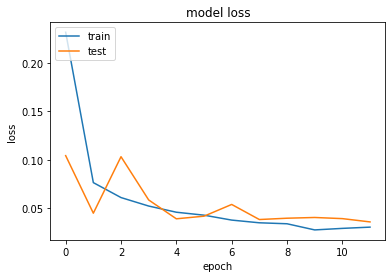

In [9]:
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Kernel", "Conv layers", "Test Score", "Test Accuracy"]

x.add_row(["3*3", 2, 0.73, 0.84])
x.add_row(["2*2", 3,0.02, 0.99])
x.add_row(["5*5", 5, 0.02, 0.99])
x.add_row(["7*7", 7,0.04, 0.99])
print (x)

+--------+-------------+------------+---------------+
| Kernel | Conv layers | Test Score | Test Accuracy |
+--------+-------------+------------+---------------+
|  3*3   |      2      |    0.73    |      0.84     |
|  2*2   |      3      |    0.02    |      0.99     |
|  5*5   |      5      |    0.02    |      0.99     |
|  7*7   |      7      |    0.04    |      0.99     |
+--------+-------------+------------+---------------+


Observations -
1. As the number of epochs increases, the loss goes on decreasing.
2. More layers give more accuracy.
3. The best accuracy obtained is 0.99.
